In [16]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [17]:

# Order by n in site
sites = ['SZ3',
        'SZ6',
        'Svip2',
        'ADHD6',
        'HSJ',
        'UCLA_CB',
        'Svip1',
        'UKBB11026',
        'UKBB11027',
        'UKBB11025',
        'ADHD1',
        'ADHD3',
        'ADHD5',
        'UCLA_DS1']

p_baseline = '../../results_reviews/sex'
p_mtl_abl = '../../results_reviews/sex/sex_ablation'
p_mtl = '../../results_reviews/sex/all'

# Load Baseline Data

In [18]:
# Single Task
st_data = []
for site in sites:
    folds = []
    for fold in range(5):
        p_parent = os.path.join(p_baseline, f"{site}/fold_{fold}")
        file = [f for f in os.listdir(p_parent) if f[-4:]=='.csv'][0]
        df = pd.read_csv(os.path.join(p_parent,file),index_col=0,header=[0,1])[site]
        folds.append(df['Accuracy/test'].iloc[-1])
    st_data.append(folds)

st_data = dict(zip(sites,st_data))
df_st = pd.DataFrame(st_data).mean()
#df_st

# Load Ablation Data

In [19]:
ablation_data = []
for site in sites:
    folds = []
    for fold in range(5):
        p_parent = os.path.join(p_mtl_abl, f"{site}/fold_{fold}")
        file = [f for f in os.listdir(p_parent) if f[-4:]=='.csv'][0]
        df = pd.read_csv(os.path.join(p_parent,file),index_col=0,header=[0,1])
        
        acc = {}
        for sub_site in sites:
            if sub_site != site:
                acc[sub_site] = df[sub_site]['Accuracy/test'].iloc[-1]
        folds.append(acc)
    df_case = pd.DataFrame(folds).mean()
    ablation_data.append(df_case)

df_ablation = pd.DataFrame(ablation_data,index=sites)[sites]
#df_ablation

# Load Normal Data

In [20]:
# Multi-task
mtl_data = []
for fold in range(5):
    p_parent = os.path.join(p_mtl, f"fold_{fold}")
    file = [f for f in os.listdir(p_parent) if f[-4:]=='.csv'][0]
    df = pd.read_csv(os.path.join(p_parent,file),index_col=0,header=[0,1])
    acc = []
    for site in sites:
        val = df[site]['Accuracy/test'].iloc[-1]
        acc.append(val)
    mtl_data.append(acc)
mtl_data = pd.DataFrame(mtl_data,columns=sites).mean()

In [21]:
mtl_full = pd.concat([mtl_data,pd.Series(14*['mtl'],index=sites)],axis=1,keys=['acc','type'])
st_full = pd.concat([df_st,pd.Series(14*['baseline'],index=sites)],axis=1,keys=['acc','type'])

df_master = pd.concat([mtl_full,st_full]).reset_index()
df_master

,index,acc,type
0,SZ3,68.571429,mtl
1,SZ6,71.428571,mtl
2,Svip2,50.000000,mtl
3,ADHD6,51.428571,mtl
4,HSJ,48.571429,mtl
5,UCLA_CB,53.888889,mtl
6,Svip1,60.222222,mtl
7,UKBB11026,80.000000,mtl
8,UKBB11027,76.000000,mtl
9,UKBB11025,62.000000,mtl


# Plots

/var/folders/5x/9dwn0lbx633gccy22ts5bskh0000gn/T/ipykernel_40051/2785661646.py:28: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[i].set_xticklabels([None,None])
/var/folders/5x/9dwn0lbx633gccy22ts5bskh0000gn/T/ipykernel_40051/2785661646.py:28: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[i].set_xticklabels([None,None])
/var/folders/5x/9dwn0lbx633gccy22ts5bskh0000gn/T/ipykernel_40051/2785661646.py:28: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[i].set_xticklabels([None,None])
/var/folders/5x/9dwn0lbx633gccy22ts5bskh0000gn/T/ipykernel_40051/2785661646.py:28: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[i].set_xticklabels([None,None])
/var/folders/5x/9dwn0lbx633gccy22ts5bskh0000gn/T/ipykernel_40051/2785661646.py:28: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[i].set_xticklabels([None,None])
/var/folders/5x/9dwn0lbx6

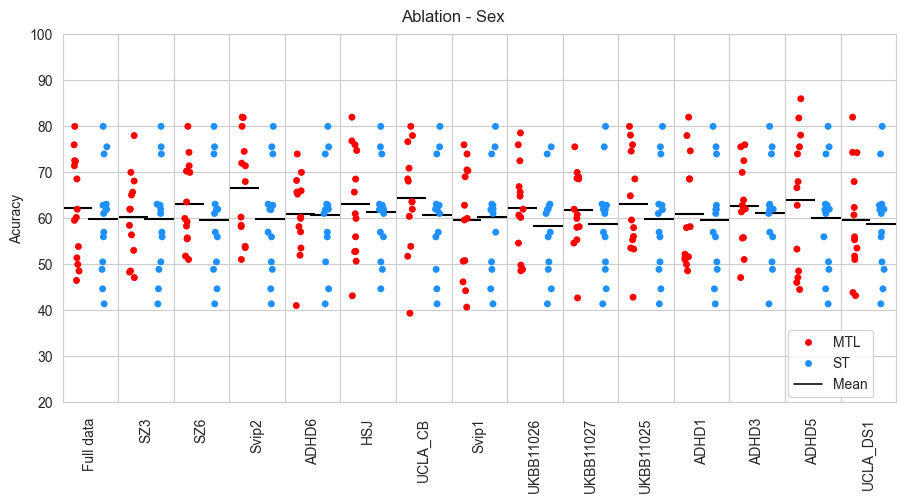

In [22]:
colors = ['black','darkorchid','red','orange','dodgerblue','forestgreen']
colors = ['red','dodgerblue']
sns.set_style('whitegrid')

plot_cases = ['Full data']+sites

fig,ax = plt.subplots(1,15,figsize=(9,5),sharey=True)
for i, case in enumerate(plot_cases):
    if case == 'Full data':
        mtl_full = pd.concat([mtl_data,pd.Series(14*['mtl'],index=sites)],axis=1,keys=['acc','type'])
        st_full = pd.concat([df_st,pd.Series(14*['baseline'],index=sites)],axis=1,keys=['acc','type'])

        df_master = pd.concat([mtl_full,st_full]).reset_index()
        sns.stripplot(data=df_master, x='type',y='acc',hue='type',ax=ax[i],legend=False,palette=colors)

        ax[i].scatter('mtl',df_master[df_master['type']=='mtl']['acc'].mean(),color='black',marker='_',sizes=[500])
        ax[i].scatter('baseline',df_master[df_master['type']=='baseline']['acc'].mean(),color='black',marker='_',sizes=[500])
    else:
        abl_case = pd.concat([df_ablation.transpose()[case],pd.Series(14*['mtl'],index=sites)],axis=1,keys=['acc','type'])
        st_drop = pd.concat([df_st.drop(case),pd.Series(14*['baseline'],index=sites)],axis=1,keys=['acc','type'])

        df_master = pd.concat([abl_case,st_drop]).reset_index()

        sns.stripplot(data=df_master, x='type',y='acc',hue='type',ax=ax[i],legend=False,palette=colors)

        ax[i].scatter('mtl',df_master[df_master['type']=='mtl']['acc'].mean(),color='black',marker='_',sizes=[500])
        ax[i].scatter('baseline',df_master[df_master['type']=='baseline']['acc'].mean(),color='black',marker='_',sizes=[500])
    ax[i].set_xticklabels([None,None])
    ax[i].set_xlabel(plot_cases[i],rotation=90)
    ax[i].set_xlim(-0.5,1.5)
ax[0].set_ylabel('Acuracy')

from matplotlib.lines import Line2D
handles = [Line2D([0], [0], marker='o',color='w', label='MTL',
                          markerfacecolor=colors[0]),
        Line2D([0], [0], marker='o', color='w', label='ST',
                          markerfacecolor=colors[1]),
        Line2D([0], [0], color='black', label='Mean',
                           linewidth=1.15,ls='-')
                          ]
labels = ['MTL','ST','Mean']
fig.legend(handles, labels, loc=(0.87,0.21))

plt.suptitle ('Ablation - Sex')
plt.ylim(20,100)
plt.tight_layout(pad=0.5)
plt.subplots_adjust(wspace=0)
plt.savefig(os.path.join('./figures/sex_ablation.png'),dpi=300)